## Airbnb Listings Analysis

**By Samuel Oyedele**

## Introduction

### Dataset Description
> Airbnb data for 250,000+ listings in 10 major cities, including information about hosts, pricing, location, and room type, along with over 5 million historical reviews.

## Objective

> Analyze Airbnb listings in Paris to determine the impact of recent regulations. 

## Data Wrangling

> In this section, the dataset are gathered, assessed for quality and tidiness issues and cleaned for further analysis and visualizations.

### Data Gathering

> The dataset (Listings) in CSV file is loaded into a dataframe using pandas `read_csv`.

In [23]:
# import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Read CSV file to a pandas dataframe

In [24]:
listings_df = pd.read_csv('Listings.csv', low_memory=False, encoding="ISO-8859-1")

### Assessing Data

> In this section, the loaded data is assessed for any quality and tidiness issues.

In [25]:
# Preview of the dataframe
listings_df.head()

,listing_id,name,host_id,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,...,minimum_nights,maximum_nights,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable
0,281420,"Beautiful Flat in le Village Montmartre, Paris",1466919,2011-12-03,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
1,3705183,39 mÃÂ² Paris (Sacre CÃ âur),10328771,2013-11-29,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
2,4082273,"Lovely apartment with Terrace, 60m2",19252768,2014-07-31,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
3,4797344,Cosy studio (close to Eiffel tower),10668311,2013-12-17,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
4,4823489,Close to Eiffel Tower - Beautiful flat : 2 rooms,24837558,2014-12-14,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f


In [26]:
# dataframe information
listings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 279712 entries, 0 to 279711
Data columns (total 33 columns):
listing_id                     279712 non-null int64
name                           279539 non-null object
host_id                        279712 non-null int64
host_since                     279547 non-null object
host_location                  278872 non-null object
host_response_time             150930 non-null object
host_response_rate             150930 non-null float64
host_acceptance_rate           166625 non-null float64
host_is_superhost              279547 non-null object
host_total_listings_count      279547 non-null float64
host_has_profile_pic           279547 non-null object
host_identity_verified         279547 non-null object
neighbourhood                  279712 non-null object
district                       37012 non-null object
city                           279712 non-null object
latitude                       279712 non-null float64
longitude               

In [27]:
# statistics summary of the dataframe
listings_df.describe()

,listing_id,host_id,host_response_rate,host_acceptance_rate,host_total_listings_count,latitude,longitude,accommodates,bedrooms,price,minimum_nights,maximum_nights,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value
count,2.797120e+05,2.797120e+05,150930.000000,166625.000000,279547.000000,279712.000000,279712.000000,279712.000000,250277.000000,279712.000000,279712.000000,2.797120e+05,188307.000000,187999.000000,188047.000000,187941.000000,188025.000000,187937.000000,187927.000000
mean,2.638196e+07,1.081658e+08,0.865939,0.827168,24.581612,18.761862,12.595075,3.288736,1.515509,608.792737,8.050967,2.755860e+04,93.405195,9.565476,9.312869,9.701534,9.698593,9.633994,9.335364
std,1.442576e+07,1.108570e+08,0.283744,0.289202,284.041143,32.560343,73.081309,2.133379,1.153080,3441.826611,31.518946,7.282875e+06,10.070437,0.990878,1.146072,0.867434,0.886884,0.833234,1.042625
min,2.577000e+03,1.822000e+03,0.000000,0.000000,0.000000,-34.264400,-99.339630,0.000000,1.000000,0.000000,1.000000,1.000000e+00,20.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
25%,1.384462e+07,1.720656e+07,0.900000,0.780000,1.000000,-22.964390,-43.198040,2.000000,1.000000,75.000000,1.000000,4.500000e+01,91.000000,9.000000,9.000000,10.000000,10.000000,9.000000,9.000000
50%,2.767098e+07,5.826911e+07,1.000000,0.980000,1.000000,40.710785,2.382780,2.000000,1.000000,150.000000,2.000000,1.125000e+03,96.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
75%,3.978485e+07,1.832853e+08,1.000000,1.000000,4.000000,41.908610,28.986730,4.000000,2.000000,474.000000,5.000000,1.125000e+03,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
max,4.834353e+07,3.901874e+08,1.000000,1.000000,7235.000000,48.904910,151.339810,16.000000,50.000000,625216.000000,9999.000000,2.147484e+09,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000


#### Quality Issues

- Missing values in some columns.
- Datatype: incorrect data type for host_since and bedrooms columns.

### Data Cleaning
> The dataset quality issues will be cleaned for analysis and visualizations.

Note: It is advisable follow this step in data cleaning in python: Define, Code and Test.

#### Define

**Missing values in some columns**

- A subset of columns will be selected which will remove some columns with null values.

#### Code

In [28]:
listings_clean = listings_df[['listing_id', 'name', 'host_id', 'host_since','neighbourhood', 'city', 
             'room_type', 'accommodates', 'bedrooms', 'price', 'minimum_nights', 'maximum_nights', 'review_scores_rating' ]]

#### Test

In [29]:
listings_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 279712 entries, 0 to 279711
Data columns (total 13 columns):
listing_id              279712 non-null int64
name                    279539 non-null object
host_id                 279712 non-null int64
host_since              279547 non-null object
neighbourhood           279712 non-null object
city                    279712 non-null object
room_type               279712 non-null object
accommodates            279712 non-null int64
bedrooms                250277 non-null float64
price                   279712 non-null int64
minimum_nights          279712 non-null int64
maximum_nights          279712 non-null int64
review_scores_rating    188307 non-null float64
dtypes: float64(2), int64(6), object(5)
memory usage: 27.7+ MB


#### Define

**Datatype: incorrect data type for host_since and bedrooms columns.**
    
- Convert the host since and bedrooms column datatype to date and integer respectively.

#### Code

In [30]:
listings_clean['host_since'] = pd.to_datetime(listings_clean['host_since'], format="%Y-%m-%d")

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [31]:
# Fill NaN with 0
listings_clean['bedrooms'] = listings_clean['bedrooms'].fillna(0)

listings_clean['bedrooms'] = listings_clean['bedrooms'].astype(int)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


#### Test

In [32]:
listings_clean.dtypes

listing_id                       int64
name                            object
host_id                          int64
host_since              datetime64[ns]
neighbourhood                   object
city                            object
room_type                       object
accommodates                     int64
bedrooms                         int64
price                            int64
minimum_nights                   int64
maximum_nights                   int64
review_scores_rating           float64
dtype: object

In [33]:
# save the cleaned dataframe
listings_clean.to_csv('airbnb_listings_data.csv', index=False)

## Exploratory Data Analysis

> The cleaned dataset will be analyzed and visualize to identify the trends and patterns in Airbnb listings by cities with major focus on Paris.

In [34]:
# load to clean dataframe
listings_data = pd.read_csv('airbnb_listings_data.csv')

In [35]:
# Make a copy of the cleaned dataset
listings_data_copy = listings_data.copy()

In [36]:
listings_data_copy.head()

,listing_id,name,host_id,host_since,neighbourhood,city,room_type,accommodates,bedrooms,price,minimum_nights,maximum_nights,review_scores_rating
0,281420,"Beautiful Flat in le Village Montmartre, Paris",1466919,2011-12-03,Buttes-Montmartre,Paris,Entire place,2,1,53,2,1125,100.0
1,3705183,39 mÃÂ² Paris (Sacre CÃ âur),10328771,2013-11-29,Buttes-Montmartre,Paris,Entire place,2,1,120,2,1125,100.0
2,4082273,"Lovely apartment with Terrace, 60m2",19252768,2014-07-31,Elysee,Paris,Entire place,2,1,89,2,1125,100.0
3,4797344,Cosy studio (close to Eiffel tower),10668311,2013-12-17,Vaugirard,Paris,Entire place,2,1,58,2,1125,100.0
4,4823489,Close to Eiffel Tower - Beautiful flat : 2 rooms,24837558,2014-12-14,Passy,Paris,Entire place,2,1,60,2,1125,100.0


In [37]:
listings_data_copy['host_since'] = pd.to_datetime(listings_data_copy['host_since'], format="%Y-%m-%d")

In [38]:
listings_data_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 279712 entries, 0 to 279711
Data columns (total 13 columns):
listing_id              279712 non-null int64
name                    279539 non-null object
host_id                 279712 non-null int64
host_since              279547 non-null datetime64[ns]
neighbourhood           279712 non-null object
city                    279712 non-null object
room_type               279712 non-null object
accommodates            279712 non-null int64
bedrooms                279712 non-null int64
price                   279712 non-null int64
minimum_nights          279712 non-null int64
maximum_nights          279712 non-null int64
review_scores_rating    188307 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(7), object(4)
memory usage: 27.7+ MB


### Average Listing Price by City

In [39]:
avg_price_city = listings_data_copy.groupby('city')['price'].mean().reset_index()
avg_price_city

,city,price
0,Bangkok,2078.278033
1,Cape Town,2405.120350
2,Hong Kong,746.169889
3,Istanbul,532.557445
4,Mexico City,1149.253028
5,New York,142.842240
6,Paris,113.096445
7,Rio de Janeiro,742.589254
8,Rome,105.107643
9,Sydney,222.013440


**Visualization**

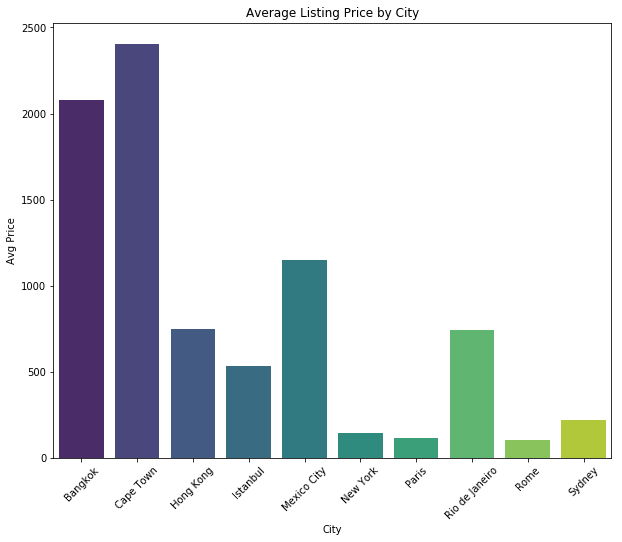

In [40]:
# Create a bar chart

# Create a figure
plt.figure(figsize=(10,8))

# Create a bar plot using seaborn bar plot
sns.barplot(data=avg_price_city, x='city', y='price', palette = 'viridis')

# Set title and labels
plt.title('Average Listing Price by City')
plt.xlabel('City')
plt.ylabel('Avg Price')
plt.xticks(rotation=45)

# Save plot
plt.savefig("avg_price_city.png", dpi=300)

# Show plot
plt.show()

> From the distribution above, the average price listings for each city varies different based on their currency rate.

In [41]:
# Calculate the average review rating for each city
review_rating_city = listings_data_copy.groupby('city')['review_scores_rating'].mean().reset_index()

# sort values by rating
review_rating_city = review_rating_city.sort_values(by='review_scores_rating', ascending=False).reset_index(drop=True)
review_rating_city

,city,review_scores_rating
0,Mexico City,94.837959
1,Rio de Janeiro,94.571349
2,Cape Town,94.404838
3,New York,93.767188
4,Rome,93.516489
5,Sydney,93.234135
6,Paris,93.063931
7,Bangkok,93.001699
8,Istanbul,91.063496
9,Hong Kong,89.707517


> **Mexico City** has the highest review scores rating of 94.84 ~ followed closely by **Rio de Janeiro** and **Cape Town**. **Hong Kong** has the lowest review scores rating of 89.7.

### We will be analyzing the above data based on Paris city.

In [42]:
# Filter data to Paris city only
paris_listings = listings_data_copy[listings_data_copy['city'] == "Paris"]

### Average Listing Price by Paris Neighbourhood

In [43]:
# calculate the average price
paris_listings_neighbourhood = paris_listings.groupby('neighbourhood')['price'].mean().reset_index()

# sort values by price in descending_order
paris_listings_neighbourhood = paris_listings_neighbourhood.sort_values(by='price', ascending=False).reset_index(drop=True)
paris_listings_neighbourhood

,neighbourhood,price
0,Elysee,210.536765
1,Louvre,175.379972
2,Passy,161.144635
3,Palais-Bourbon,156.856578
4,Luxembourg,155.638639
5,Bourse,149.496801
6,Hotel-de-Ville,144.472110
7,Temple,138.446823
8,Pantheon,122.662150
9,Opera,119.038644


**Visualization**

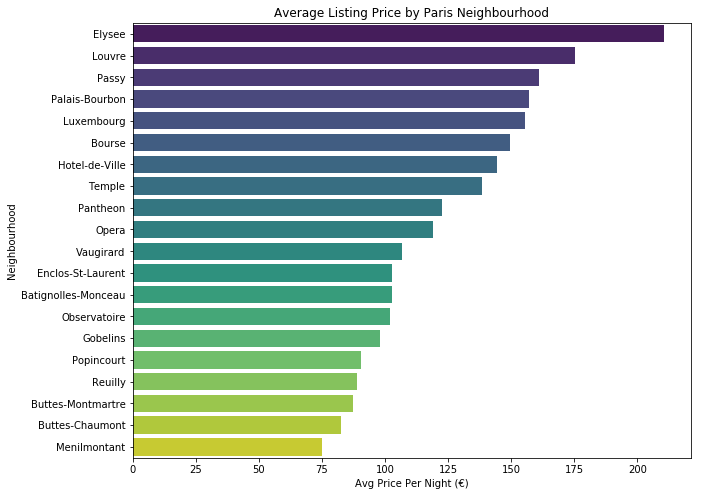

In [44]:
# Create a horizontal bar chart

# Create a figure
plt.figure(figsize=(10,8))

# Create a bar plot using seaborn bar plot
sns.barplot(data=paris_listings_neighbourhood, x='price', y='neighbourhood', palette='viridis')

# Set title and labels
plt.title('Average Listing Price by Paris Neighbourhood')
plt.xlabel('Avg Price Per Night (€)')
plt.ylabel('Neighbourhood')

# Save plot
plt.savefig("paris_listing_neighbourhood.png", dpi=300)

# Show plot
plt.show()


> From the distribution above, **Elysee** neighbourhood is the most expensive neighbourhood in Paris while **Menilmontant** is the cheapest neighbourhood in Paris.

### Factors Influencing the Most Expensive Neighbourhood in Paris

#### Average Listing Price by Accommodates in Paris

In [45]:
# calculate the average price
paris_listings_accommodates = paris_listings.query("neighbourhood == 'Elysee'").groupby('accommodates').agg({"price": "mean", "listing_id": "count"}).reset_index()

paris_listings_accommodates

,accommodates,price,listing_id
0,0,0.000000,6
1,1,79.522222,90
2,2,155.103352,716
3,3,152.828767,146
4,4,212.096070,458
5,5,328.817073,82
6,6,355.508571,175
7,7,411.538462,26
8,8,405.518519,27
9,9,440.272727,11


**Visualization**

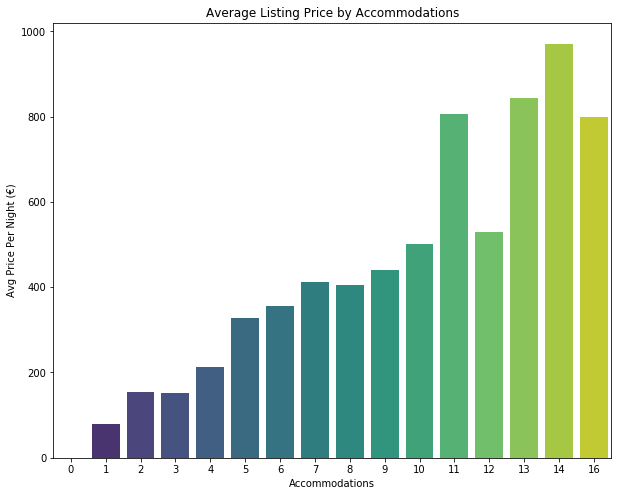

In [46]:
# Create a bar chart

# Create a figure
plt.figure(figsize=(10,8))

# Create a bar plot using seaborn bar plot
sns.barplot(data=paris_listings_accommodates, x='accommodates', y='price', palette='viridis')

# Set title and labels
plt.title('Average Listing Price by Accommodations')
plt.xlabel('Accommodations')
plt.ylabel('Avg Price Per Night (€)')

# Save plot
plt.savefig("paris_listing_accomodates.png", dpi=300)

# Show plot
plt.show()


> From the chart above, the higher the accommodates, the higher the listing price. The most expensive listings have accommodations of 14 people for €971. The highest accommodations '16' has only one listing compare to two listings for '14' accommodations.

#### Average Listing Price by Bedrooms in Paris

In [47]:
paris_listings_bedrooms = paris_listings.query("neighbourhood == 'Elysee'").groupby(['bedrooms'])['price'].mean().reset_index()
paris_listings_bedrooms

,bedrooms,price
0,0,96.386431
1,1,177.051227
2,2,302.013289
3,3,409.720588
4,4,482.636364
5,5,509.777778
6,6,602.500000


**Visualization**

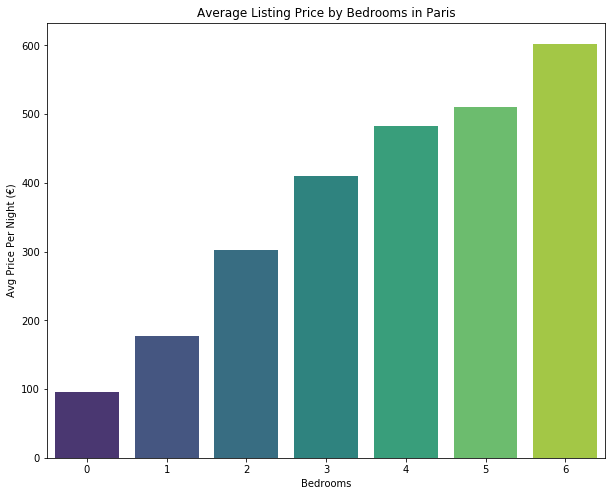

In [48]:
# Create a bar chart

# Create a figure
plt.figure(figsize=(10,8))

# Create a bar plot using seaborn bar plot
sns.barplot(data=paris_listings_bedrooms, x='bedrooms', y='price', palette='viridis')

# Set title and labels
plt.title('Average Listing Price by Bedrooms in Paris')
plt.xlabel('Bedrooms')
plt.ylabel('Avg Price Per Night (€)')

# Save plot
plt.savefig("paris_listing_bedrooms.png", dpi=300)


# Show plot
plt.show()


> From the chart above, the higher the bedrooms, the higher the listing price. The most expensive listings have 6 bedrooms for €602.

#### Average Listing Price by Room type in Paris

In [49]:
paris_listings_roomtype = paris_listings.query("neighbourhood == 'Elysee'").groupby(['room_type'])['price'].mean().reset_index()
paris_listings_roomtype = paris_listings_roomtype.sort_values(by='price', ascending=False).reset_index(drop=True)
paris_listings_roomtype

,room_type,price
0,Hotel room,378.090395
1,Entire place,195.591925
2,Private room,173.673575
3,Shared room,45.636364


**Visualization**

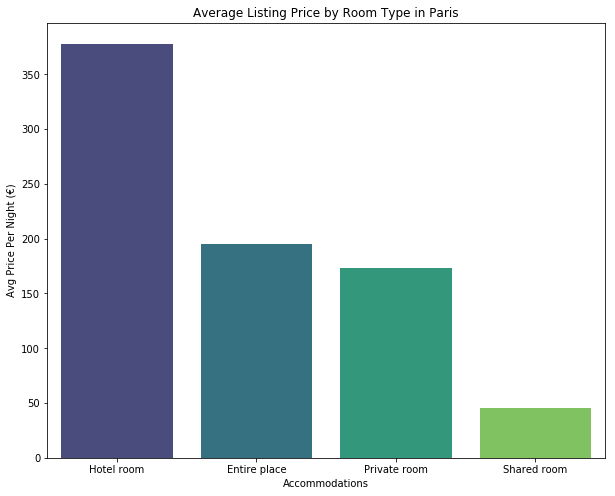

In [50]:
# Create a bar chart

# Create a figure
plt.figure(figsize=(10,8))

sns.barplot(data=paris_listings_roomtype, x='room_type', y='price', palette='viridis')

# Set title and labels
plt.title('Average Listing Price by Room Type in Paris')
plt.xlabel('Accommodations')
plt.ylabel('Avg Price Per Night (€)')

# Save plot
plt.savefig("paris_listing_room_type.png", dpi=300)

# Show plot
plt.show()

> From the chart above, **Hotel room** space is the most expensive listings room type with average price of €378 followed by **Entire place** space.

### Airbnb Hosts and Price Over Time in Paris

The numbers of new airbnb hosts over time and average airbnb price in paris per year.

In [51]:
# Create a year column from host since date
paris_listings['year'] = paris_listings['host_since'].dt.year
paris_listings['year'] = paris_listings['year'].fillna(0).astype(int)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [52]:
paris_listings_time = paris_listings.groupby('year').agg({"listing_id": "count", "price": "mean"}).reset_index()
paris_listings_time = paris_listings_time[1:]
paris_listings_time

,year,listing_id,price
1,2008,4,77.750000
2,2009,106,159.641509
3,2010,416,125.031250
4,2011,1339,124.828230
5,2012,4592,111.578615
6,2013,8142,107.096414
7,2014,10922,100.253800
8,2015,12147,103.646250
9,2016,8871,114.159847
10,2017,4585,108.658888


**Visualizations**

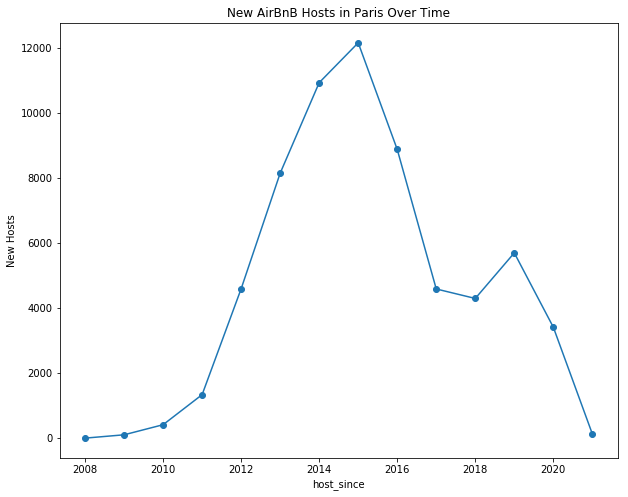

In [53]:
# Create a line chart

# Create a figure
plt.figure(figsize=(10,8))


# Create a line plot using matplotlib plot
plt.plot(paris_listings_time['year'], paris_listings_time['listing_id'], marker='o')

# Set title and labels
plt.title('New AirBnB Hosts in Paris Over Time')
plt.xlabel('host_since')
plt.ylabel('New Hosts')

# Save plot
plt.savefig("new_airbnb_paris.png", dpi=300)


# Show plot
plt.show()

> From the chart above, Since the launched of **Airbnb** in 2008, the no of new hosts in Paris increase rapidly from 4 hosts in 2008 to **12147** hosts in **2015**. Since the government regulations in 2015, the no of new hosts decreases drastically yearly.

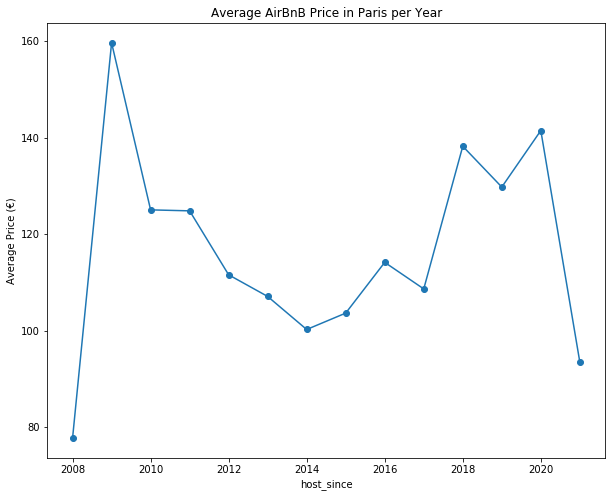

In [54]:
# Create a line chart

# Create a figure
plt.figure(figsize=(10,8))

# Create a line plot using matplotlib plot
plt.plot(paris_listings_time['year'], paris_listings_time['price'], marker='o')

# Set title and labels
plt.title('Average AirBnB Price in Paris per Year')
plt.xlabel('host_since')
plt.ylabel('Average Price (€)')

# Save plot
plt.savefig("avg_price_paris.png", dpi=300)

# Show plot
plt.show()

> From the chart above, The average airbnb price peak in 2009 then begin to decline due to rise of new hosts which create competition for customers. After the 2015 regulations in prices, the average price rise again to a high point in 2020 before the pandemic due to decline of new hosts which later declined during the middle of the Covid lockdown in 2021.

### Summary of Findings

- The average price listings for each city varies different based on their currency rate.


- **Mexico City** has the highest review scores rating of 94.84 ~ followed closely by **Rio de Janeiro** and **Cape Town**. **Hong Kong** has the lowest review scores rating of 89.7.



- **Elysee** neighbourhood is the most expensive neighbourhood in Paris while **Menilmontant** is the cheapest neighbourhood in Paris.



- The higher the accommodates, the higher the listing price. The most expensive listings have accommodations of 14 people for €971. The highest accommodations '16' has only one listing compare to two listings for '14' accommodations.


- The higher the bedrooms, the higher the listing price. The most expensive listings have 6 bedrooms for €602.



- **Hotel room** space is the most expensive listings room type with average price of €378 followed by **Entire place** space.



- Since the launched of **Airbnb** in 2008, the no of new hosts in Paris increase rapidly from 4 hosts in 2008 to **12147** hosts in **2015**. Since the government regulations in 2015, the no of new hosts decreases drastically yearly.



- The average Airbnb price peak in 2009 then begin to decline due to rise of new hosts which create competition for customers. After the 2015 regulations in prices, the average price rise again to a high point in 2020 before the pandemic due to decline of new hosts which later declined during the middle of the Covid lockdown in 2021.



- 2015 regulations lead to fewer number of new hosts with higher prices.

## Conclusions

From the analysis above, I was able to identify the trends and patterns in Airbnb listings in Paris city. Uncovered insights on the Airbnb market in Paris and factors with the biggest influence in price.

The 2015 regulations had a great impact in Airbnb listings in Paris which lead to fewer number of new hosts, higher prices from 2015 till 2021. 